In [325]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [326]:
dataframe = pd.read_csv('train.csv')
dataframe.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [327]:
dataframe.dtypes

x      int64
y    float64
dtype: object

here there is no categorical data so our steps will be:
    Handling missing data\n
 X  Handling categorical data 
 #There is no categorical data
 X  Split the dataset into training set and test set \n
    # as already it was splitted
    Feature scaling


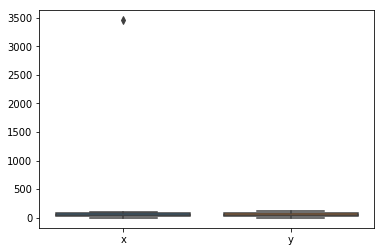

In [328]:
# checking the outlier
sns.boxplot(data=dataframe)

In [329]:
# here we see that there is one outlier in our data

In [330]:
# checking the null values
dataframe.isna().sum()

x    0
y    1
dtype: int64

In [331]:
# storing the number of rows that are empty
def print_the_missing_rows_in_col(col):
    empty = dataframe[col].isna().sum()
    count=0
    row_nums = np.empty(0)
    for counter in range(0,len(dataframe)):
        if count >= empty:
            break
        if(np.isnan(dataframe[col][counter])):
            row_nums = np.append(row_nums, counter)
            print('row = {},\n{}'.format(counter,dataframe.loc[counter,:]))
    return row_nums

In [332]:
# storing the row numbers where the data is missing.
empty_rows_y = print_the_missing_rows_in_col('y')

row = 213,
x    3456.0
y       NaN
Name: 213, dtype: float64


In [333]:
# for counter in empty_rows_y:
dataframe = dataframe.reset_index(drop=True)

In [334]:
dataframe.x[213]


3456

In [335]:
len(dataframe)

700

deleting the row where the value in row is null as it'll affect the computation when we're scaling the data and even the value of the mean will not be what it should be and while computing the data in each row should be in same format so it its float whole row hould be float and nan is not a number. So it'll show an error if we do computation on such data

In [336]:
# deleting the missing row
dataframe.dropna(inplace = True)

In [337]:
# As after deltion the row number was also deleted we reset the index the data
dataframe = dataframe.reset_index(drop=True)

In [338]:
# we're confirming the data null data is removed 
len(dataframe)


699

In [339]:
dataframe.x[213]

72

In [340]:
dataframe.x.mean()

50.01430615164521

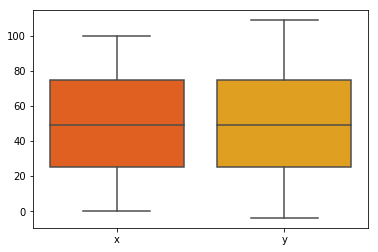

In [341]:
# checking if any outliers
sns.boxplot(data = dataframe, palette='autumn')

In [342]:
dataframe.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [343]:
def feature_scaling_column(dataframe, column_scaling):
    mean_of_col = dataframe[column_scaling].mean()
    std_of_col = dataframe[column_scaling].std()
    print('for col= {} mean= {} and std={} '.format(column_scaling,mean_of_col,std_of_col))
    for counter in range(0, len(dataframe)):
        dataframe.loc[counter, column_scaling] =  ((dataframe.loc[counter, column_scaling] - mean_of_col) / std_of_col)
    print("successfully scaled column ",column_scaling)
    return dataframe  

In [344]:
dataframe = feature_scaling_column(dataframe, 'x')

for col= x mean= 50.01430615164521 and std=28.954560214557876 
successfully scaled column  x


In [345]:
dataframe.head()

,x,y
0,-0.898453,21.549452
1,-0.000494,47.464463
2,-1.209285,17.218656
3,-0.414937,36.586398
4,1.277370,87.288984


In [346]:
dataframe= feature_scaling_column(dataframe,'y')

for col= y mean= 49.939869170457804 and std=29.109217100389873 
successfully scaled column  y


In [347]:
dataframe.head()

,x,y
0,-0.898453,-0.975307
1,-0.000494,-0.085039
2,-1.209285,-1.124084
3,-0.414937,-0.458737
4,1.277370,1.283068


In [348]:
def Linear_Regression():
    cost = np.empty(0)
    # y = wx+b
    learning_rate = 0.0001
    w = 0
    b = 0
    plt
    df_size = len(dataframe)
    for counter in range(0,100000):
        # creating the predicted output by our supposed values of w and b
        Ypred = pd.Series(np.multiply(w,dataframe.x) + b)
        # loss =  1/2m sum of (y^ - y)**2
        diff_pred = Ypred-dataframe.y
        
        # squaring each term
        loss = (diff_pred)**2
        loss_error_sum = loss.sum()
        loss_error_sum /= (2*df_size)
        # storing the costs so that we can check which is min
        # cost = np.append(cost, loss_error_sum)
        
        # calculate d/d0 of j0,01
        derivate_b = (np.sum(diff_pred))/df_size
        derivate_w = np.sum(np.multiply(dataframe.x, diff_pred))/df_size
        # update w and b in line equation
        w = w - learning_rate*(derivate_w/df_size)
        b = b - learning_rate*(derivate_b/df_size)
        if(counter%100 == 0):
            plt.subplot(3,1,1)
            # plt.plot(counter,loss_error_sum, marker='x', color='r')
            plt.plot(w,loss_error_sum,marker='o',color='r')
            plt.subplot(3,1,2)
            plt.plot(b,loss_error_sum,marker='x',color='g')
            plt.subplot(3,1,3)
            plt.plot(counter,loss_error_sum,marker='x',color='g')
            
        if(loss_error_sum<=0.00009): 
            break
    plt.show()
    print("counter = {} and cost function = {}".format(counter, loss_error_sum))
    return (w, b)
            

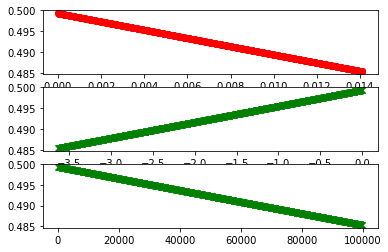

counter = 99999 and cost function = 0.48535221077598106


In [349]:
w, b = Linear_Regression()

In [350]:
print('w = {} and b = {}'.format(w,b))
# np.sum(np.multiply(dataframe.x, 2))/4
yarr = pd.Series(np.multiply(w,dataframe.x) + b)

w = 0.014118030476342865 and b = -3.636112843666624e-18


In [351]:
yarr.head()

0   -0.012684
1   -0.000007
2   -0.017073
3   -0.005858
4    0.018034
Name: x, dtype: float64

In [352]:
ac = yarr**2
ac.head()

0    1.608936e-04
1    4.865864e-11
2    2.914777e-04
3    3.431719e-05
4    3.252234e-04
Name: x, dtype: float64

def testing()

    

In [353]:
def testing():
    dataframe = pd.read_csv('test.csv')
    Ypred = pd.Series(np.multiply(w,dataframe.x) + b)
#     for counter in range(0, len(dataframe)):
#         Ypred[counter]=(abs(Ypred[counter]-dataframe.y[counter])/dataframe.y[counter])
    error_predicts = np.divide((abs(Ypred-dataframe.y)),dataframe.y)
#         plt.plot(counter,Ypred[counter],marker='+',color='g')
    plt.show()
    error = np.sum(error_predicts)/len(dataframe)
    return (1-error)*100

In [354]:
Ypred.head()

0    1.087088
1    0.296479
2    0.310597
3    0.282361
4    0.508249
Name: x, dtype: float64

In [355]:
accuracy=testing()

In [356]:
accuracy

5.440347663671707